In [49]:
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_csv('travel insurance.csv',sep=',')
row,column=df.shape
print("The dataset has {} Rows and {} Columns".format(row,column))
print('')
cols=list(df.columns)
continous=list(set(df._get_numeric_data().columns)-{'Duration','Age'})
print("Columns : ",cols)
print("Continous Variables   : ",continous)
categorical=list(set(cols)-set(continous))
print("Categorical Variables : ",categorical)
# Duration and Age are categorical ( done in EDA part [Ayush_Project.ipynb] )
df_=df.copy()
df_['Gender']=df_['Gender'].fillna('N')

The dataset has 63326 Rows and 11 Columns

Columns :  ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Gender', 'Age']
Continous Variables   :  ['Net Sales', 'Commision (in value)']
Categorical Variables :  ['Gender', 'Agency', 'Agency Type', 'Age', 'Destination', 'Distribution Channel', 'Claim', 'Product Name', 'Duration']


In [51]:
df_ = df_[df_.Age != 118]
df_ = df_[df_.Duration >=0]
print("Now the dataset  has {} Rows and {} Columns".format(df_.shape[0],df_.shape[1]))
print("%d records deleted from the dataset"%(df.shape[0]-df_.shape[0]))
df_=df_.reset_index().drop(columns='index')
df1=df_.copy()

Now the dataset  has 62342 Rows and 11 Columns
984 records deleted from the dataset


In [52]:
# Label Encoding
le=LabelEncoder()
le_df=pd.DataFrame()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  le_df[i]=le.fit_transform(df_[i])
for j in list(df_._get_numeric_data().columns):
  le_df[j]=df_[j]
print("Label Encoded dataset  has {} Rows and {} Columns".format(le_df.shape[0],le_df.shape[1]))

Label Encoded dataset  has 62342 Rows and 11 Columns


In [53]:
relation=dict()
for l in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  indx=[]
  for x in df_[l].unique():
    #print(x,' ',df_.index[df_[l] == x].tolist()[0])
    indx.append(df_.index[df_[l] == x].tolist()[0])
  dic=dict(zip(le_df.loc[indx][l].to_list(),df_.loc[indx][l].to_list()))
  relation[l]=dic
  print(dic)

{0: 'F', 2: 'N', 1: 'M'}
{3: 'CBH', 6: 'CWT', 8: 'JZI', 9: 'KML', 7: 'EPX', 2: 'C2B', 11: 'RAB', 12: 'SSI', 1: 'ART', 5: 'CSR', 4: 'CCR', 0: 'ADM', 10: 'LWC', 14: 'TTW', 13: 'TST'}
{1: 'Travel Agency', 0: 'Airlines'}
{78: 'MALAYSIA', 4: 'AUSTRALIA', 61: 'ITALY', 138: 'UNITED STATES', 128: 'THAILAND', 95: 'NORWAY', 143: 'VIET NAM', 32: 'DENMARK', 117: 'SINGAPORE', 63: 'JAPAN', 137: 'UNITED KINGDOM', 57: 'INDONESIA', 56: 'INDIA', 26: 'CHINA', 41: 'FRANCE', 125: 'TAIWAN, PROVINCE OF CHINA', 101: 'PHILIPPINES', 87: 'MYANMAR', 53: 'HONG KONG', 67: 'KOREA, REPUBLIC OF', 136: 'UNITED ARAB EMIRATES', 88: 'NAMIBIA', 92: 'NEW ZEALAND', 28: 'COSTA RICA', 19: 'BRUNEI DARUSSALAM', 102: 'POLAND', 121: 'SPAIN', 31: 'CZECH REPUBLIC', 44: 'GERMANY', 122: 'SRI LANKA', 21: 'CAMBODIA', 5: 'AUSTRIA', 120: 'SOUTH AFRICA', 127: 'TANZANIA, UNITED REPUBLIC OF', 70: "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 89: 'NEPAL', 90: 'NETHERLANDS', 76: 'MACAO', 29: 'CROATIA', 40: 'FINLAND', 23: 'CANADA', 130: 'TUNISIA', 109: '

In [54]:
#OneHotEncoding
ohe=OneHotEncoder()
ohe_df=df_.copy()
s=0
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)-{'Claim'}):
  ohe_df = pd.get_dummies(ohe_df, columns=[i], prefix=[i] )
ohe_df=ohe_df.drop(columns='Claim')
print(s)
print("One Hot Encoded dataset  has {} Rows and {} Columns".format(ohe_df.shape[0],ohe_df.shape[1]))

0
One Hot Encoded dataset  has 62342 Rows and 199 Columns


Functions 

In [55]:
def print_result(y_test,y_pred):
  print("Confusion Matrix       : \n" ,confusion_matrix(y_test,y_pred))
  print("Accuracy of Model      : ",accuracy_score(y_test, y_pred))
  print("Precision of Model     : ",precision_score(y_test, y_pred))
  print("Recall of Model        : " , recall_score(y_test, y_pred))
  print("F1 Score of Model      : " ,f1_score(y_test, y_pred))
  print("ROC_AUC score of Model : " ,roc_auc_score(y_test,y_pred))	
  fpr, tpr, thresholds = roc_curve(y_test,y_pred)
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='best')

In [56]:
def print_input(X_train, X_test, y_train, y_test):
  print("TRAIN(X_train) Feature set        : ",len(X_train))
  print("TRAIN(y_train) Label Feature set  : ",len(y_train))
  print("TEST (X_test)  Feature set        : ",len(X_test))
  print("TEST (y_test)  Label set          : ",len(y_test))
  print("-------For Training Set--------\n")
  print(y_train['Claim'].value_counts())
  l_1,l_2= y_train['Claim'].value_counts()
  print("Class Label 1 is : ",(l_1/y_train.shape[0])*100,"%")
  print("Class Label 0 is : ",(l_2/y_train.shape[0])*100,"%")
  print("\n-------For Testing Set--------\n")
  print(y_test['Claim'].value_counts())
  l_1,l_2= y_test['Claim'].value_counts()
  print("Class Label 1 is : ",(l_1/y_test.shape[0])*100,"%")
  print("Class Label 0 is : ",(l_2/y_test.shape[0])*100,"%")

In [57]:
target = pd.DataFrame(le_df['Claim'])
le_df=le_df.drop(columns='Claim')

**With Gender Column**

Decision Tree with Lable Encoding

In [58]:
X_train, X_test, y_train, y_test = train_test_split(le_df,target,test_size = 0.25, random_state = 21, stratify = target)
print_input(X_train, X_test, y_train, y_test)

TRAIN(X_train) Feature set        :  46756
TRAIN(y_train) Label Feature set  :  46756
TEST (X_test)  Feature set        :  15586
TEST (y_test)  Label set          :  15586
-------For Training Set--------

0    46068
1      688
Name: Claim, dtype: int64
Class Label 1 is :  98.52853109761314 %
Class Label 0 is :  1.4714689023868595 %

-------For Testing Set--------

0    15357
1      229
Name: Claim, dtype: int64
Class Label 1 is :  98.53073270884127 %
Class Label 0 is :  1.4692672911587321 %


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15116   241]
 [  217    12]]
Accuracy of Model      :  0.9706146541768254
Precision of Model     :  0.04743083003952569
Recall of Model        :  0.05240174672489083
F1 Score of Model      :  0.049792531120331954
ROC_AUC score of Model :  0.5183542887430536


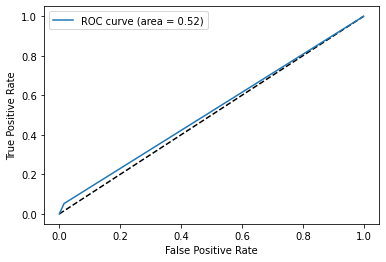

In [59]:
dtc = DecisionTreeClassifier(random_state=21)
dtc.fit(X_train, y_train)
print(dtc)
y_pred = dtc.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

Hyperparameter Tuning ( Lable Encoding)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=100, max_features=5, max_leaf_nodes=2000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
Confusion Matrix       : 
 [[15068   289]
 [  209    20]]
Accuracy of Model      :  0.9680482484280765
Precision of Model     :  0.06472491909385113
Recall of Model        :  0.08733624454148471
F1 Score of Model      :  0.07434944237918216
ROC_AUC score of Model :  0.534258732415953


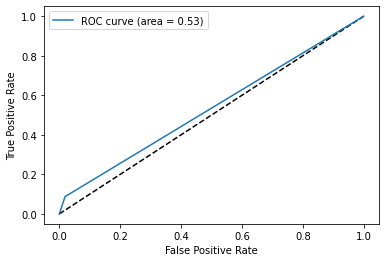

In [60]:
#Using GridSearch , find the optimal hyperparameters
param_grid = {
   'max_leaf_nodes': [ 100,200,1000,2000 ],
   'class_weight' : ['balanced'],
   'criterion' :['entropy','gini'], 
   'max_depth' : [ 100,500],
   'min_samples_split': [2],
   'max_features' : [5,8,10]
    }
CV_dt = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
dtc_best = CV_dt.best_estimator_
print(dtc_best)
y_pred = dtc_best.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

Decision Tree with One hot Encoding 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(ohe_df,target,test_size = 0.25, random_state = 21, stratify = target)
print_input(X_train, X_test, y_train, y_test)

TRAIN(X_train) Feature set        :  46756
TRAIN(y_train) Label Feature set  :  46756
TEST (X_test)  Feature set        :  15586
TEST (y_test)  Label set          :  15586
-------For Training Set--------

0    46068
1      688
Name: Claim, dtype: int64
Class Label 1 is :  98.52853109761314 %
Class Label 0 is :  1.4714689023868595 %

-------For Testing Set--------

0    15357
1      229
Name: Claim, dtype: int64
Class Label 1 is :  98.53073270884127 %
Class Label 0 is :  1.4692672911587321 %


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15115   242]
 [  213    16]]
Accuracy of Model      :  0.9708071346079815
Precision of Model     :  0.06201550387596899
Recall of Model        :  0.06986899563318777
F1 Score of Model      :  0.06570841889117043
ROC_AUC score of Model :  0.5270553547547979


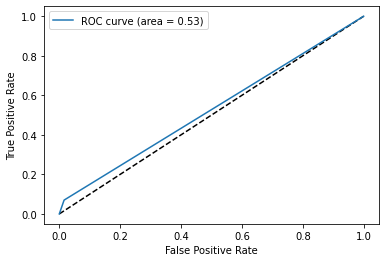

In [62]:
dtc = DecisionTreeClassifier(random_state=21)
dtc.fit(X_train, y_train)
print(dtc)
y_pred = dtc.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

Hyperparameter Tuning ( One Hot Encoding)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=50, max_features=20, max_leaf_nodes=800,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
Confusion Matrix       : 
 [[14010  1347]
 [  135    94]]
Accuracy of Model      :  0.9049146670088541
Precision of Model     :  0.0652324774462179
Recall of Model        :  0.4104803493449782
F1 Score of Model      :  0.1125748502994012
ROC_AUC score of Model :  0.6613839527541456


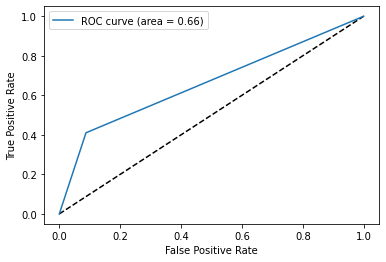

In [74]:
#Using GridSearch , find the optimal hyperparameters
param_grid = {
   'max_leaf_nodes': [ 800 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'], 
   'max_depth' : [ 20,50,60],
   'min_samples_split': [5,2,6],
   'max_features' : [20]
    }
CV_dt = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
dtc_best = CV_dt.best_estimator_
print(dtc_best)
y_pred = dtc_best.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

**Without Gender Column (Dropping the Column)**

In [64]:
df_=df_.drop(columns='Gender')
# Label Encoding
le=LabelEncoder()
le_df=pd.DataFrame()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  le_df[i]=le.fit_transform(df_[i])
for j in list(df_._get_numeric_data().columns):
  le_df[j]=df_[j]
print("Label Encoded dataset  has {} Rows and {} Columns".format(le_df.shape[0],le_df.shape[1]))
#OneHotEncoding
ohe=OneHotEncoder()
ohe_df=df_.copy()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)-{'Claim'}):
  ohe_df = pd.get_dummies(ohe_df, columns=[i], prefix=[i] )
ohe_df=ohe_df.drop(columns='Claim')
print("One Hot Encoded dataset  has {} Rows and {} Columns".format(ohe_df.shape[0],ohe_df.shape[1]))

Label Encoded dataset  has 62342 Rows and 10 Columns
One Hot Encoded dataset  has 62342 Rows and 196 Columns


In [65]:
target = pd.DataFrame(le_df['Claim'])
le_df=le_df.drop(columns='Claim')

Decision Tree with Lable Encoding

In [66]:
X_train, X_test, y_train, y_test = train_test_split(le_df,target,test_size = 0.25, random_state = 21, stratify = target)
print_input(X_train, X_test, y_train, y_test)

TRAIN(X_train) Feature set        :  46756
TRAIN(y_train) Label Feature set  :  46756
TEST (X_test)  Feature set        :  15586
TEST (y_test)  Label set          :  15586
-------For Training Set--------

0    46068
1      688
Name: Claim, dtype: int64
Class Label 1 is :  98.52853109761314 %
Class Label 0 is :  1.4714689023868595 %

-------For Testing Set--------

0    15357
1      229
Name: Claim, dtype: int64
Class Label 1 is :  98.53073270884127 %
Class Label 0 is :  1.4692672911587321 %


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15121   236]
 [  214    15]]
Accuracy of Model      :  0.9711279353265752
Precision of Model     :  0.05976095617529881
Recall of Model        :  0.06550218340611354
F1 Score of Model      :  0.06250000000000001
ROC_AUC score of Model :  0.5250672992956855


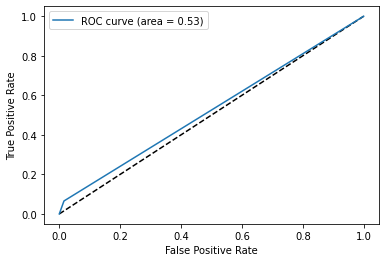

In [67]:
dtc = DecisionTreeClassifier(random_state=21)
dtc.fit(X_train, y_train)
print(dtc)
y_pred = dtc.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

Hyperparameter Tuning ( Lable Encoding)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=100, max_features=8,
                       max_leaf_nodes=1300, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=21, splitter='best')
Confusion Matrix       : 
 [[14826   531]
 [  198    31]]
Accuracy of Model      :  0.9532272552290517
Precision of Model     :  0.05516014234875445
Recall of Model        :  0.13537117903930132
F1 Score of Model      :  0.07838179519595449
ROC_AUC score of Model :  0.5503970566030654


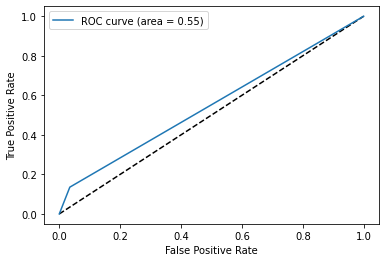

In [68]:
#Using GridSearch , find the optimal hyperparameters
param_grid = {
   'max_leaf_nodes': [ 1000,1200,1300 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'], 
   'max_depth' : [ 100,200],
   'min_samples_split': [2,3],
   'max_features' : [2,5,8]
    }
CV_dt = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
dtc_best = CV_dt.best_estimator_
print(dtc_best)
y_pred = dtc_best.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

Decision Tree with One hot Encoding 

In [69]:
X_train, X_test, y_train, y_test = train_test_split(ohe_df,target,test_size = 0.25, random_state = 21, stratify = target)
print_input(X_train, X_test, y_train, y_test)

TRAIN(X_train) Feature set        :  46756
TRAIN(y_train) Label Feature set  :  46756
TEST (X_test)  Feature set        :  15586
TEST (y_test)  Label set          :  15586
-------For Training Set--------

0    46068
1      688
Name: Claim, dtype: int64
Class Label 1 is :  98.52853109761314 %
Class Label 0 is :  1.4714689023868595 %

-------For Testing Set--------

0    15357
1      229
Name: Claim, dtype: int64
Class Label 1 is :  98.53073270884127 %
Class Label 0 is :  1.4692672911587321 %


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15104   253]
 [  212    17]]
Accuracy of Model      :  0.9701655331707943
Precision of Model     :  0.06296296296296296
Recall of Model        :  0.07423580786026202
F1 Score of Model      :  0.06813627254509018
ROC_AUC score of Model :  0.5288806180018899


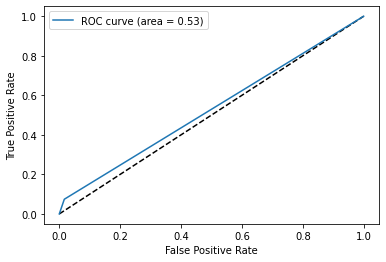

In [70]:
dtc = DecisionTreeClassifier(random_state=21)
dtc.fit(X_train, y_train)
print(dtc)
y_pred = dtc.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

Hyperparameter Tuning ( One Hot Encoding)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=100, max_features=5, max_leaf_nodes=2000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
Confusion Matrix       : 
 [[14663   694]
 [  165    64]]
Accuracy of Model      :  0.9448864365456179
Precision of Model     :  0.08443271767810026
Recall of Model        :  0.2794759825327511
F1 Score of Model      :  0.12968591691995948
ROC_AUC score of Model :  0.6171424322379194


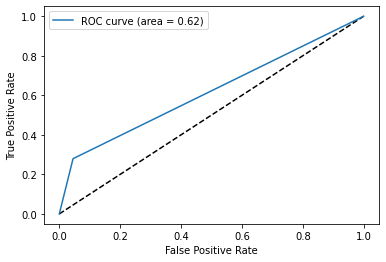

In [71]:
#Using GridSearch , find the optimal hyperparameters
param_grid = {
   'max_leaf_nodes': [ 2000],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'], 
   'max_depth' : [ 20,100,60],
   'min_samples_split': [4,2,6],
   'max_features' : [5,20,50,100]
    }
CV_dt = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
dtc_best = CV_dt.best_estimator_
print(dtc_best)
y_pred = dtc_best.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)